# Creating a ML model by using clustering of catagorical data.

In [3]:
# importing modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

sns.set()

In [4]:
# import data set

dataAll = pd.read_csv('../data/dataset.csv')
dataAll

,Nervousness,Unable to control,Worry,Trouble in Relaxation,Restlessness,Irritability,Fear,Stress
0,Severe,Moderate,Mild,No,Mild,Mild,No,Mild
1,No,No,Mild,Mild,No,Mild,Moderate,Mild
2,Severe,Severe,Mild,Severe,Severe,Mild,Severe,Severe
3,No,Severe,Severe,Mild,Severe,No,Severe,Moderate
4,Mild,No,No,No,No,No,Mild,No
...,...,...,...,...,...,...,...,...
16379,Mild,Severe,Mild,No,Moderate,No,Mild,Mild
16380,Mild,No,No,No,Severe,No,No,No
16381,No,Moderate,Moderate,Mild,Severe,No,Moderate,Mild
16382,Severe,Mild,Severe,Mild,No,Mild,Severe,Moderate


In [5]:
# encoding the labels

intensity = {
    'No': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3,
}

newData = {}

for colName, colData in dataAll.iteritems():
    newArr = []
    for item in colData:
        newArr.append(intensity[item])
        
    newData[f'{colName}_Label'] = newArr
    
dataLabeled = pd.DataFrame.from_dict(newData)
dataLabeled


### writing data
# dataLabeled.to_csv('../data/labeled_data.csv', index=False)

In [53]:
# splitting model into train and test

dataTrain, dataTest = train_test_split(dataLabeled, train_size=0.8)

In [32]:
dataTrain.shape

(13107, 8)

In [33]:
dataTest.shape 

(3277, 8)

## Using elbow method to evaluate different numbers of catagories.
It is important to note that there are only 4 catagories that we are looking for.

Distortions with 4 clusters: 88025.04804384826


Text(0, 0.5, 'Distortion')

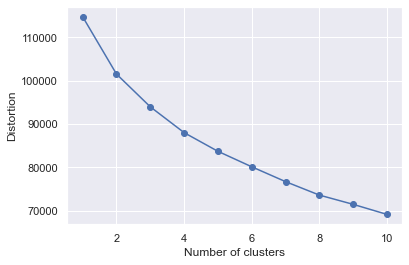

In [63]:
distortions = []

for i in range(1, 11): # 1 to 10 inclusive
    km = KMeans(
        n_clusters = i, 
        init = 'random',
        n_init = 10,
        max_iter = 300,
        tol = 1e-04,
        random_state = 0
    )
    km.fit(dataTrain.drop('Stress_Label', axis=1))
    distortions.append(km.inertia_)
    
print(f"Distortions with 4 clusters: {distortions[3]}")
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [66]:
# determining score when number of clusters = 4

km4 = KMeans(
    n_clusters = 4,
    init = 'random',
    n_init = 10,
    max_iter = 600,
    tol = 1e-04,
    random_state = 0
).fit(dataTrain.drop('Stress_Label', axis=1))

km4.inertia_

88025.04804384826